In [1]:
import pandas as pd
import numpy as np
import copy
import random

In [2]:
playerstats = pd.read_csv("../data/ind_off_allplayers_allgames.csv")

/home/welced12/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (24,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
playerstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135836 entries, 0 to 135835
Data columns (total 29 columns):
Unnamed: 0         135836 non-null int64
fumbles            135836 non-null float64
fumbles_lost       135836 non-null float64
pass_att           135836 non-null float64
pass_cmp           135836 non-null float64
pass_int           135836 non-null float64
pass_long          135836 non-null float64
pass_rating        135836 non-null float64
pass_sacked        135836 non-null float64
pass_sacked_yds    135836 non-null float64
pass_td            135836 non-null float64
pass_yds           135836 non-null float64
player_a           135836 non-null object
player_href        135836 non-null object
rec                135836 non-null float64
rec_long           135836 non-null float64
rec_td             135836 non-null float64
rec_yds            135836 non-null float64
rush_att           135836 non-null float64
rush_long          135836 non-null float64
rush_td            135836 non-nul

In [4]:
playerstats.player_href.unique()[:3]

array(['/players/C/CousKi00.htm', '/players/B/BibbKa00.htm',
       '/players/P/PeriSa00.htm'], dtype=object)

In [5]:
# Make a dictionary to easily recall games for each player
data_cols = [
    'season', 'week','pass_att', 'pass_cmp', 'pass_yds', 'pass_td', 'pass_int',
    'rush_att', 'rush_yds', 'rush_td',
    'targets', 'rec', 'rec_yds', 'rec_td'
]
data_dict = {
    x: playerstats.loc[playerstats.player_href==x,data_cols].sort_values(by=['season','week'])
    for x in playerstats.player_href.unique()
}

In [6]:
for plyr in [x for x in data_dict.keys()][:3]:
    print(plyr)
    print(data_dict[plyr])

/players/C/CousKi00.htm
       season  week  pass_att  pass_cmp  pass_yds  pass_td  pass_int  \
73475    2012     1       0.0       0.0       0.0      0.0       0.0   
73476    2012     2       0.0       0.0       0.0      0.0       0.0   
73477    2012     3       0.0       0.0       0.0      0.0       0.0   
73478    2012     4       0.0       0.0       0.0      0.0       0.0   
28927    2012     5       9.0       5.0     111.0      1.0       2.0   
73479    2012     6       0.0       0.0       0.0      0.0       0.0   
73480    2012     7       0.0       0.0       0.0      0.0       0.0   
73481    2012     8       0.0       0.0       0.0      0.0       0.0   
73482    2012     9       0.0       0.0       0.0      0.0       0.0   
73483    2012    11       0.0       0.0       0.0      0.0       0.0   
73484    2012    12       0.0       0.0       0.0      0.0       0.0   
73485    2012    13       0.0       0.0       0.0      0.0       0.0   
26308    2012    14       2.0       2.0 

In [7]:
import tensorflow as tf

/home/welced12/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
cols = ['pass_att','rush_att','targets']
x = data_dict[[x for x in data_dict.keys()][25]]
x[cols]

,pass_att,rush_att,targets
73872,0.0,0.0,0.0
73873,0.0,0.0,0.0
73874,0.0,0.0,0.0
73875,0.0,0.0,0.0
73876,0.0,0.0,0.0
73877,0.0,0.0,0.0
73878,0.0,0.0,0.0
73879,0.0,0.0,0.0
73880,0.0,0.0,0.0
73881,0.0,0.0,0.0


In [9]:
# Make a dataset from a pandas DataFrame
dataset = tf.data.Dataset.from_tensor_slices(x[cols])

iter = dataset.make_one_shot_iterator()
el = iter.get_next()

with tf.Session() as sess:
    print(sess.run(el))
    print(sess.run(el))

[0. 0. 0.]
[0. 0. 0.]


In [10]:
# Make a dataset from generator based on pandas DataFrame
seq = np.array(x[cols])
print(seq)

def generator():
    for el in seq:
        yield [e for e in el]
        
dataset = tf.data.Dataset().from_generator(generator,
                                            output_types=tf.float32,
                                            output_shapes=(tf.TensorShape(
                                                            [3]))
                                          ).batch(4)

iter = dataset.make_initializable_iterator()
el = iter.get_next()

with tf.Session() as sess:
    sess.run(iter.initializer)
    print("batch 1")
    s = sess.run(el)
    x = s[:-1]
    y = s[-1]
    print(x,y)
    print("batch 2")
    print(sess.run(el))

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  2.]
 [ 0.  0.  1.]
 [ 0.  0.  2.]
 [ 0.  0.  4.]
 [ 0.  0.  6.]
 [ 0.  0.  2.]
 [ 0.  0.  3.]
 [ 0.  0.  5.]
 [ 0.  0.  1.]
 [ 0.  0.  2.]
 [ 0.  0.  3.]
 [ 0.  0.  4.]
 [ 0.  0. 10.]
 [ 0.  0.  8.]
 [ 0.  0.  3.]
 [ 0.  0.  3.]
 [ 0.  0.  5.]
 [ 0.  0.  6.]
 [ 0.  0.  7.]
 [ 0.  0.  3.]
 [ 0.  0.  5.]
 [ 0.  0.  9.]
 [ 0.  0.  5.]
 [ 0.  0.  8.]
 [ 0.  0.  2.]
 [ 0.  0.  0.]
 [ 0.  0.  3.]
 [ 0.  0.  4.]
 [ 0.  0.  6.]
 [ 0.  0.  9.]
 [ 0.  0.  8.]
 [ 0.  0.  9.]
 [ 0.  0.  5.]
 [ 0.  0.  4.]
 [ 0.  0.  3.]
 [ 0.  0.  3.]
 [ 0.  0.  2.]
 [ 0.  0.  6.]
 [ 0.  0.  1.]
 [ 0.  0.  5.]
 [ 0.  0.  4.]
 [ 0.  0.  5.]]
batch 1
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0.

In [11]:
# Make a datset that will bootstrap each player's set of games.
# To start with, use a history of 7 games to predict the 8th.

hist_length = 7  # Time periods of historical sequence used for model
f_horizon = 1    # How many periods in the future to predict
x_batches = []   # placeholder for inputs
y_batches = []   # placeholder for labels

# Parameters to pull data from the main dictionary
cols = ['pass_att','rush_att','targets']
#x = data_dict[[x for x in data_dict.keys()]

for player_hist in data_dict.values():
    seq = np.array(player_hist[cols])
    for i in range(len(seq)):
        if i + hist_length + f_horizon > len(seq):
            break
        x_batches.append(seq[i:i+hist_length])
        y_batches.append(seq[i+hist_length:i+hist_length+f_horizon])

    print("player data contains",len(seq),"games: adding",i,"batches")

print("num of x batches =",len(x_batches))
print("num of y batches =",len(x_batches))

player data contains 96 games: adding 89 batches
player data contains 32 games: adding 25 batches
player data contains 16 games: adding 9 batches
player data contains 32 games: adding 25 batches
player data contains 64 games: adding 57 batches
player data contains 193 games: adding 186 batches
player data contains 96 games: adding 89 batches
player data contains 96 games: adding 89 batches
player data contains 48 games: adding 41 batches
player data contains 48 games: adding 41 batches
player data contains 32 games: adding 25 batches
player data contains 16 games: adding 9 batches
player data contains 192 games: adding 185 batches
player data contains 128 games: adding 121 batches
player data contains 16 games: adding 9 batches
player data contains 97 games: adding 90 batches
player data contains 96 games: adding 89 batches
player data contains 16 games: adding 9 batches
player data contains 48 games: adding 41 batches
player data contains 32 games: adding 25 batches
player data contai

player data contains 64 games: adding 57 batches
player data contains 32 games: adding 25 batches
player data contains 32 games: adding 25 batches
player data contains 48 games: adding 41 batches
player data contains 32 games: adding 25 batches
player data contains 32 games: adding 25 batches
player data contains 128 games: adding 121 batches
player data contains 48 games: adding 41 batches
player data contains 112 games: adding 105 batches
player data contains 16 games: adding 9 batches
player data contains 16 games: adding 9 batches
player data contains 144 games: adding 137 batches
player data contains 65 games: adding 58 batches
player data contains 16 games: adding 9 batches
player data contains 32 games: adding 25 batches
player data contains 32 games: adding 25 batches
player data contains 48 games: adding 41 batches
player data contains 208 games: adding 201 batches
player data contains 16 games: adding 9 batches
player data contains 80 games: adding 73 batches
player data cont

player data contains 16 games: adding 9 batches
player data contains 16 games: adding 9 batches
player data contains 16 games: adding 9 batches
player data contains 16 games: adding 9 batches
player data contains 32 games: adding 25 batches
player data contains 16 games: adding 9 batches
player data contains 16 games: adding 9 batches
player data contains 208 games: adding 201 batches
player data contains 64 games: adding 57 batches
player data contains 16 games: adding 9 batches
player data contains 48 games: adding 41 batches
player data contains 16 games: adding 9 batches
player data contains 32 games: adding 25 batches
player data contains 160 games: adding 153 batches
player data contains 128 games: adding 121 batches
player data contains 32 games: adding 25 batches
player data contains 16 games: adding 9 batches
player data contains 96 games: adding 89 batches
player data contains 16 games: adding 9 batches
player data contains 144 games: adding 137 batches
player data contains 6

player data contains 16 games: adding 9 batches
player data contains 64 games: adding 57 batches
player data contains 80 games: adding 73 batches
player data contains 80 games: adding 73 batches
player data contains 145 games: adding 138 batches
player data contains 32 games: adding 25 batches
player data contains 48 games: adding 41 batches
player data contains 48 games: adding 41 batches
player data contains 128 games: adding 121 batches
player data contains 112 games: adding 105 batches
player data contains 80 games: adding 73 batches
player data contains 64 games: adding 57 batches
player data contains 128 games: adding 121 batches
player data contains 16 games: adding 9 batches
player data contains 144 games: adding 137 batches
player data contains 48 games: adding 41 batches
player data contains 160 games: adding 153 batches
player data contains 128 games: adding 121 batches
player data contains 144 games: adding 137 batches
player data contains 16 games: adding 9 batches
player 

player data contains 16 games: adding 9 batches
player data contains 16 games: adding 9 batches
player data contains 16 games: adding 9 batches
player data contains 80 games: adding 73 batches
player data contains 64 games: adding 57 batches
player data contains 16 games: adding 9 batches
player data contains 16 games: adding 9 batches
player data contains 32 games: adding 25 batches
player data contains 16 games: adding 9 batches
player data contains 96 games: adding 89 batches
player data contains 64 games: adding 57 batches
player data contains 95 games: adding 88 batches
player data contains 16 games: adding 9 batches
player data contains 32 games: adding 25 batches
player data contains 16 games: adding 9 batches
player data contains 112 games: adding 105 batches
player data contains 16 games: adding 9 batches
player data contains 96 games: adding 89 batches
player data contains 80 games: adding 73 batches
player data contains 48 games: adding 41 batches
player data contains 48 gam

player data contains 64 games: adding 57 batches
player data contains 64 games: adding 57 batches
player data contains 48 games: adding 41 batches
player data contains 64 games: adding 57 batches
player data contains 32 games: adding 25 batches
player data contains 64 games: adding 57 batches
player data contains 32 games: adding 25 batches
player data contains 32 games: adding 25 batches
player data contains 64 games: adding 57 batches
player data contains 64 games: adding 57 batches
player data contains 64 games: adding 57 batches
player data contains 16 games: adding 9 batches
player data contains 64 games: adding 57 batches
player data contains 16 games: adding 9 batches
player data contains 48 games: adding 41 batches
player data contains 32 games: adding 25 batches
player data contains 16 games: adding 9 batches
player data contains 64 games: adding 57 batches
player data contains 64 games: adding 57 batches
player data contains 32 games: adding 25 batches
player data contains 64

In [12]:
print(x_batches[50:52])
print(y_batches[50:52])

[array([[49.,  0.,  0.],
       [46.,  1.,  0.],
       [32.,  1.,  0.],
       [43.,  1.,  0.],
       [40.,  3.,  0.],
       [40.,  0.,  0.],
       [25.,  0.,  0.]]), array([[46.,  1.,  0.],
       [32.,  1.,  0.],
       [43.,  1.,  0.],
       [40.,  3.,  0.],
       [40.,  0.,  0.],
       [25.,  0.,  0.],
       [30.,  1.,  0.]])]
[array([[30.,  1.,  0.]]), array([[29.,  4.,  0.]])]


In [13]:
# Shuffle the batches in order to make train/test sets
random.seed(42)   # Use same random seed to shuffle both the same way.
random.shuffle(x_batches)
random.seed(42)
random.shuffle(y_batches)

train_proportion = 0.9
x_train = x_batches[ : int(len(x_batches)*train_proportion) ]
y_train = y_batches[ : int(len(x_batches)*train_proportion) ]
x_test  = x_batches[ int(len(x_batches)*train_proportion) : ]
y_test  = y_batches[ int(len(x_batches)*train_proportion) : ]

In [15]:
print(x_train[50:52])
print(y_train[50:52])

[array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]), array([[ 0.,  0.,  8.],
       [ 0.,  1.,  5.],
       [ 0.,  0.,  7.],
       [ 0.,  0., 11.],
       [ 0.,  0.,  9.],
       [ 0.,  0.,  8.],
       [ 0.,  0.,  3.]])]
[array([[0., 0., 0.]]), array([[0., 0., 8.]])]


In [32]:
# Create placeholders
x = tf.placeholder(tf.float32, shape=[None, hist_length, len(cols)])
y = tf.placeholder(tf.float32, shape=[None, f_horizon, len(cols)])
# Create two datasets with placeholders, one for training and one for test
train_dataset = tf.data.Dataset.from_tensor_slices((x,y))
test_dataset = tf.data.Dataset.from_tensor_slices((x,y))
# Create iterators from the datasets
train_iterator = train_dataset.make_initializable_iterator()
test_iterator = test_dataset.make_initializable_iterator()

# Make iterator that can take a particular handle
handle = tf.placeholder(tf.string, shape=[])
iter = tf.data.Iterator.from_string_handle(
    handle, train_dataset.output_types, train_dataset.output_shapes
)
next_elements = iter.get_next()

# Test 
with tf.Session() as sess:
    train_handle = sess.run(train_iterator.string_handle())
    test_handle = sess.run(test_iterator.string_handle())
    
    # initialize the iterators
    sess.run(train_iterator.initializer, 
             feed_dict={ x: x_train, y: y_train })
    sess.run(train_iterator.initializer,
             feed_dict={ x: x_test, y: y_test })
    
    for _ in range(2):
        x, y = sess.run(next_elements, feed_dict={handle: train_handle})
        print(x, y)

[[0. 0. 2.]
 [0. 0. 5.]
 [0. 0. 2.]
 [0. 0. 8.]
 [0. 0. 5.]
 [0. 0. 6.]
 [0. 0. 9.]] [[0. 0. 6.]]
[[0. 0. 0.]
 [0. 0. 2.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]] [[0. 0. 3.]]


# A basic RNN

In [95]:
# Hiddel layer parameters
hidden = 512
batch_size = 10

# Reset graph
tf.reset_default_graph()

# Create placeholders
x = tf.placeholder(tf.float32, shape=[None, hist_length, len(cols)])
y = tf.placeholder(tf.float32, shape=[None, f_horizon, len(cols)])
# Create two datasets with placeholders, one for training and one for test
train_dataset = tf.data.Dataset.from_tensor_slices((x,y)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x,y)).batch(batch_size)
# Create iterators from the datasets
train_iterator = train_dataset.make_initializable_iterator()
test_iterator = test_dataset.make_initializable_iterator()
# Make iterator that can take a particular handle
handle = tf.placeholder(tf.string, shape=[])
iter = tf.data.Iterator.from_string_handle(
    handle, train_dataset.output_types, train_dataset.output_shapes
)
(next_x, next_y) = iter.get_next()

# Make a BasicRNNCell
#rnn_cell = tf.nn.rnn_cell.BasicRNNCell(hidden)
# Use an LSTM cell
rnn_cell = tf.nn.rnn_cell.BasicLSTMCell(hidden)
# 'outputs' is a tensor of shape [batch_size, max_time, cell_state_size]
# 'state' is a tensor of shape [batch_size, cell_state_size]
rnn_out, state = tf.nn.dynamic_rnn(rnn_cell, x,
                                dtype=tf.float32)
# Change output into a tensor
stacked_rnn_output = tf.reshape(rnn_out, [-1, hidden])
# layers.dense Adds biases to the weights output from the RNN
stacked_outputs = tf.layers.dense(stacked_rnn_output, len(cols))
# Shape of results
pred = tf.reshape(stacked_outputs, [-1, hist_length, len(cols)])

# Loss and Training op
#loss = tf.losses.mean_squared_error(pred, y)
loss = tf.reduce_sum(tf.square(pred - y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(loss)

# Create global variable initializer
init = tf.global_variables_initializer()

# start Session
with tf.Session() as sess:
    sess.run(init)
    
    # Initialize data for feeding
    train_handle = sess.run(train_iterator.string_handle())
    test_handle = sess.run(test_iterator.string_handle())
    
    # initialize the iterators
    sess.run(train_iterator.initializer, 
             feed_dict={ x: x_train, y: y_train })
    sess.run(train_iterator.initializer,
             feed_dict={ x: x_test, y: y_test })
    
#    print(state.shape)
    print("rnn_out.shape:",rnn_out.shape)
    print("stacked_rnn_output.shape:",stacked_rnn_output.shape)
    print("stacked_outputs.shape:",stacked_outputs.shape)
    print("pred.shape:",pred.shape)
    
    # Try giving the RNN an input
    for i in range(1000):
        # Get an input, real_out batch
        this_x, real_y = sess.run((next_x, next_y), feed_dict={handle: train_handle})
        if i==999:
            print("x.shape:",this_x.shape)
            print(this_x)
            print("y.shape:",real_y.shape)
            print(real_y)
        
        _, loss_value, pred_y = sess.run([train_op, loss, pred],
                                 feed_dict={x: this_x, y: real_y})

        if i==999:
            print("pred_y.shape:",pred_y.shape)
            print(pred_y)
        if (i)%100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(i, loss_value))


rnn_out.shape: (?, 7, 512)
stacked_rnn_output.shape: (?, 512)
stacked_outputs.shape: (?, 3)
pred.shape: (?, 7, 3)
Iter: 0, Loss: 8734.1719
Iter: 100, Loss: 3551.6279
Iter: 200, Loss: 10364.7012
Iter: 300, Loss: 1500.9033
Iter: 400, Loss: 4720.5405
Iter: 500, Loss: 2451.2004
Iter: 600, Loss: 4415.3340
Iter: 700, Loss: 9119.7129
Iter: 800, Loss: 11756.3105
Iter: 900, Loss: 6151.6899
x.shape: (10, 7, 3)
[[[ 0.  0.  0.]
  [ 0.  1.  1.]
  [ 0.  4.  4.]
  [ 0.  2.  1.]
  [ 0.  2.  2.]
  [ 0.  4.  5.]
  [ 0.  1.  4.]]

 [[ 0.  0.  6.]
  [ 0.  0. 11.]
  [ 0.  0.  4.]
  [ 0.  0.  5.]
  [ 0.  0.  5.]
  [ 0.  0.  6.]
  [ 0.  0.  4.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  5.  0.]
  [ 0.  1.  2.]
  [ 0.  2.  3.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  1.  2.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  6.]
  [ 0.  0.  5.]
  [ 0.  0.  5.]
  [ 0.  0.  7.]
  [ 0.  0.  3.]
  [ 0.  0.  6.]]

 [[ 0.  0.  0.]
  [ 0.  0.

# Above is new

In [119]:
playerstats = pd.read_csv('../data/pfr_ind_off_snaps.csv')
playerstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30455 entries, 0 to 30454
Data columns (total 35 columns):
Unnamed: 0         30455 non-null int64
away               30455 non-null object
fumbles            30452 non-null float64
fumbles_lost       30452 non-null float64
gid                30455 non-null object
home               30455 non-null object
off_pct            30437 non-null object
offense            30437 non-null float64
pass_att           30455 non-null int64
pass_cmp           30455 non-null int64
pass_int           30455 non-null int64
pass_long          30455 non-null int64
pass_rating        3601 non-null float64
pass_sacked        30455 non-null int64
pass_sacked_yds    30455 non-null int64
pass_td            30455 non-null int64
pass_yds           30455 non-null int64
player             0 non-null float64
player_a_x         30455 non-null object
player_href        30455 non-null object
pos                30437 non-null object
rec                30455 non-null int64

In [120]:
stat_cols = ['player_href','player_a_x','season','week','offense']

In [121]:
snaps = copy.deepcopy(
    playerstats.sort_values(
        by=['player_href','season','week'],
        ascending=[True,True,True]
    )[stat_cols]
)

In [122]:
snaps.head(5)

,player_href,player_a_x,season,week,offense
12608,/players/A/AbbrJa00.htm,Jared Abbrederis,2015,10,19.0
11711,/players/A/AbbrJa00.htm,Jared Abbrederis,2015,13,16.0
11393,/players/A/AbbrJa00.htm,Jared Abbrederis,2015,14,14.0
10959,/players/A/AbbrJa00.htm,Jared Abbrederis,2015,15,27.0
10721,/players/A/AbbrJa00.htm,Jared Abbrederis,2015,16,14.0


In [123]:
snaps[
    (snaps.player_a_x == 'Jared Abbrederis') &
    (snaps.season == 2015) &
    (snaps.week == 11)
].index

Int64Index([], dtype='int64')

In [124]:
# Find a way to insert rows of zeros for weeks when players didn't play
for player in snaps.player_href.unique():
    name = snaps[snaps.player_href==player]['player_a_x'].values[0]
    print(player, name)
    for yr in snaps[ snaps['player_href'] == player ].season.unique():
        for wk in range(1,18):
            # Check for an entry from a particular week
            qry = snaps[
                (snaps.player_href == player) &
                (snaps.season == yr) &
                (snaps.week == wk)
            ]
            if not len(qry.index) >= 1:
                # Add row to snaps DataFrame with 0 snaps that week
                row = pd.Series({
                    'player_href': player,
                    'player_a_x': name,
                    'season': yr,
                    'week': wk,
                    'offense': 0
                })
                snaps = snaps.append(row, ignore_index=True)

/players/A/AbbrJa00.htm Jared Abbrederis
/players/A/AbduAm00.htm Ameer Abdullah
/players/A/AbduIs00.htm Isa Abdul-Quddus
/players/A/AdamDa01.htm Davante Adams
/players/A/AdamJe01.htm Jerell Adams
/players/A/AdamJo01.htm Joe Adams
/players/A/AdamKr00.htm Kris Adams
/players/A/AdamKy00.htm Kyle Adams
/players/A/AddiBr01.htm Bralon Addison
/players/A/AghoNe00.htm Nelson Agholor
/players/A/AgneJa00.htm Jamal Agnew
/players/A/AgneRa00.htm Ray Agnew
/players/A/AikeKa00.htm Kamar Aiken
/players/A/AjayJa00.htm Jay Ajayi
/players/A/AjirSe00.htm Seyi Ajirotutu
/players/A/AlexDa00.htm Danario Alexander
/players/A/AlfoMa00.htm Mario Alford
/players/A/AlleAn01.htm Anthony Allen
/players/A/AlleAr00.htm Armando Allen
/players/A/AlleDw00.htm Dwayne Allen
/players/A/AlleJa01.htm Javorius Allen
/players/A/AlleJa22.htm Jared Allen
/players/A/AlleKe00.htm Keenan Allen
/players/A/AlleWi21.htm Will Allen
/players/A/AlliGe01.htm Geronimo Allison
/players/A/AluaTy99.htm Tyson Alualu
/players/A/AmarJa00.htm Ja

/players/C/ClemTo00.htm Toney Clemons
/players/C/ClevAs00.htm Asante Cleveland
/players/C/ClutTy00.htm Tyler Clutts
/players/C/CoatSa00.htm Sammie Coates
/players/C/CobbDa00.htm David Cobb
/players/C/CobbRa00.htm Randall Cobb
/players/C/CoffCh00.htm Chase Coffman
/players/C/CoheTa00.htm Tarik Cohen
/players/C/ColeBr00.htm Brandon Coleman
/players/C/ColeCo00.htm Corey Coleman
/players/C/ColeDe00.htm Derrick Coleman
/players/C/ColeKe00.htm Keelan Cole
/players/C/ColeTe01.htm Tevin Coleman
/players/C/CollAl00.htm Alex Collins
/players/C/CollAu00.htm Austin Collie
/players/C/CollJe01.htm Jed Collins
/players/C/ColqDu20.htm Dustin Colquitt
/players/C/ColsMa00.htm Marques Colston
/players/C/ConeKe00.htm Kevin Cone
/players/C/ConlCh00.htm Chris Conley
/players/C/ConnJa00.htm James Conner
/players/C/ConnJo00.htm John Conner
/players/C/ConsSe20.htm Sean Considine
/players/C/CookBr00.htm Brandin Cooks
/players/C/CookCo00.htm Connor Cook
/players/C/CookDa01.htm Dalvin Cook
/players/C/CookJa02.htm

/players/G/GoodMi00.htm Mike Goodson
/players/G/GoodRi00.htm Richard Goodman
/players/G/GordJo02.htm Josh Gordon
/players/G/GordMe00.htm Melvin Gordon
/players/G/GordRi00.htm Richard Gordon
/players/G/GoreFr00.htm Frank Gore
/players/G/GradBr00.htm Bruce Gradkowski
/players/G/GragCh00.htm Chris Gragg
/players/G/GrahGa00.htm Garrett Graham
/players/G/GrahJi00.htm Jimmy Graham
/players/G/GrahRa00.htm Ray Graham
/players/G/GrahT.00.htm T.J. Graham
/players/G/GranCo00.htm Corey Grant
/players/G/GranJa00.htm Jakeem Grant
/players/G/GranRy00.htm Ryan Grant
/players/G/GranRy01.htm Ryan Grant
/players/G/GrasHr00.htm Hroniss Grasu
/players/G/GrayCy00.htm Cyrus Gray
/players/G/GrayJo00.htm Jonas Gray
/players/G/GrayMa00.htm MarQueis Gray
/players/G/GreeA.00.htm A.J. Green
/players/G/GreeAl00.htm Alex Green
/players/G/GreeBe00.htm BenJarvus Green-Ellis
/players/G/GreeDo00.htm Dorial Green-Beckham
/players/G/GreeLa00.htm Ladarius Green
/players/G/GreeRa00.htm Rashad Greene
/players/G/GreeSh00.htm 

/players/J/JoneZa00.htm Zay Jones
/players/J/JuszKy00.htm Kyle Juszczyk
/players/K/KaepCo00.htm Colin Kaepernick
/players/K/KamaAl00.htm Alvin Kamara
/players/K/KariDe00.htm Deji Karim
/players/K/KasaNi00.htm Nick Kasa
/players/K/KaseDr00.htm Drew Kaser
/players/K/KearJe01.htm Jermaine Kearse
/players/K/KeenCa00.htm Case Keenum
/players/K/KelcTr00.htm Travis Kelce
/players/K/KeleSe00.htm Senio Kelemete
/players/K/KellDu00.htm Dustin Keller
/players/K/KellRo00.htm Robert Kelley
/players/K/KendLa00.htm Lance Kendricks
/players/K/KeoxSh00.htm Shiloh Keo
/players/K/KerlJe00.htm Jeremy Kerley
/players/K/KernBr20.htm Brett Kern
/players/K/KerrJo00.htm Joe Kerridge
/players/K/KessCo00.htm Cody Kessler
/players/K/KingJe00.htm Jeff King
/players/K/KingMa00.htm Marquette King
/players/K/KingTa00.htm Tavarres King
/players/K/KittGe00.htm George Kittle
/players/K/KizeDe00.htm DeShone Kizer
/players/K/KlugKa00.htm Karl Klug
/players/K/KochSa20.htm Sam Koch
/players/K/KolbKe00.htm Kevin Kolb
/player

/players/N/NiklTr00.htm Troy Niklas
/players/N/NixxRo01.htm Roosevelt Nix
/players/N/NjokDa00.htm David Njoku
/players/N/NoblDa00.htm Danny Noble
/players/N/NortBr00.htm Brad Nortman
/players/N/NorwJo00.htm Jordan Norwood
/players/N/NorwKe00.htm Kevin Norwood
/players/O/O'ShJa00.htm James O'Shaughnessy
/players/O/OConJa00.htm Jake O'Connell
/players/O/ODonPa00.htm Pat O'Donnell
/players/O/OLeaNi00.htm Nick O'Leary
/players/O/ObomBe00.htm Ben Obomanu
/players/O/OgboCh00.htm Chris Ogbonnaya
/players/O/OgleKe00.htm Kevin Ogletree
/players/O/OlawJa00.htm Jamize Olawale
/players/O/OlivBr01.htm Branden Oliver
/players/O/OlseGr00.htm Greg Olsen
/players/O/OrloDa00.htm Dan Orlovsky
/players/O/OrtoKy00.htm Kyle Orton
/players/O/OsgoKa00.htm Kassim Osgood
/players/O/OsweBr00.htm Brock Osweiler
/players/O/OwenMo01.htm Montell Owens
/players/O/OwusCh00.htm Chris Owusu
/players/P/PageEr00.htm Eric Page
/players/P/PainCu00.htm Curtis Painter
/players/P/PalaMi00.htm Michael Palardy
/players/P/PalmCa0

/players/S/SmitAl02.htm Alex Smith
/players/S/SmitAl03.htm Alex Smith
/players/S/SmitAl22.htm Alfonso Smith
/players/S/SmitAn01.htm Antone Smith
/players/S/SmitAr00.htm Armond Smith
/players/S/SmitBr01.htm Brad Smith
/players/S/SmitDe04.htm Devin Smith
/players/S/SmitDe06.htm De'Veon Smith
/players/S/SmitGe00.htm Geno Smith
/players/S/SmitHa01.htm Hayden Smith
/players/S/SmitJo01.htm Jonnu Smith
/players/S/SmitJu00.htm JuJu Smith-Schuster
/players/S/SmitKe02.htm Kevin Smith
/players/S/SmitKe03.htm Keith Smith
/players/S/SmitKe04.htm Kevin Smith
/players/S/SmitLe00.htm Lee Smith
/players/S/SmitRo05.htm Rodney Smith
/players/S/SmitRo06.htm Rod Smith
/players/S/SmitRu01.htm Rusty Smith
/players/S/SmitSt01.htm Steve Smith
/players/S/SmitSt02.htm Steve Smith
/players/S/SmitTo02.htm Torrey Smith
/players/S/SneaWi00.htm Willie Snead
/players/S/SnelJa00.htm Jason Snelling
/players/S/SoldNa00.htm Nate Solder
/players/S/SpadRy00.htm Ryan Spadola
/players/S/SpaeMa00.htm Matt Spaeth
/players/S/Spe

/players/W/WillKy01.htm Kyle Williams
/players/W/WillKy20.htm Kyle Williams
/players/W/WillLu00.htm Luke Willson
/players/W/WillMa00.htm Matt Willis
/players/W/WillMa03.htm Marcus Williams
/players/W/WillMa04.htm Maxx Williams
/players/W/WillMa09.htm Marquez Williams
/players/W/WillMi04.htm Mike Williams
/players/W/WillMi06.htm Michael Williams
/players/W/WillMi07.htm Mike Williams
/players/W/WillNi02.htm Nick Williams
/players/W/WillRy00.htm Ryan Williams
/players/W/WillSt01.htm Stephen Williams
/players/W/WillTe00.htm Teddy Williams
/players/W/WillTe01.htm Terrance Williams
/players/W/WillTo00.htm Tourek Williams
/players/W/WillTr03.htm Trey Williams
/players/W/WillTy00.htm Tyrell Williams
/players/W/WillWe00.htm Wendall Williams
/players/W/WilsAl02.htm Albert Wilson
/players/W/WilsDa01.htm David Wilson
/players/W/WilsJe00.htm Jesus Wilson
/players/W/WilsMa02.htm Marquess Wilson
/players/W/WilsRu00.htm Russell Wilson
/players/W/WingBr00.htm Brad Wing
/players/W/WingRo00.htm Ronnie Wi

In [125]:
# Sort the DataFrame again
snaps = snaps.sort_values(
        by=['player_href','season','week'],
        ascending=[True,True,True]
)
snaps.head(20)

,player_href,player_a_x,season,week,offense
30455,/players/A/AbbrJa00.htm,Jared Abbrederis,2015,1,0.0
30456,/players/A/AbbrJa00.htm,Jared Abbrederis,2015,2,0.0
30457,/players/A/AbbrJa00.htm,Jared Abbrederis,2015,3,0.0
30458,/players/A/AbbrJa00.htm,Jared Abbrederis,2015,4,0.0
30459,/players/A/AbbrJa00.htm,Jared Abbrederis,2015,5,0.0
30460,/players/A/AbbrJa00.htm,Jared Abbrederis,2015,6,0.0
30461,/players/A/AbbrJa00.htm,Jared Abbrederis,2015,7,0.0
30462,/players/A/AbbrJa00.htm,Jared Abbrederis,2015,8,0.0
30463,/players/A/AbbrJa00.htm,Jared Abbrederis,2015,9,0.0
0,/players/A/AbbrJa00.htm,Jared Abbrederis,2015,10,19.0


In [126]:
snaps.groupby(['week']).agg(['count'])

,player_href,player_a_x,season,offense
,count,count,count,count
week,,,,
1,3495,3495,3495,3495
2,3495,3495,3495,3494
3,3495,3495,3495,3493
4,3495,3495,3495,3494
5,3495,3495,3495,3495
6,3495,3495,3495,3495
7,3495,3495,3495,3493
8,3495,3495,3495,3494


In [127]:
snaps[
    snaps.offense.isnull()
]

,player_href,player_a_x,season,week,offense
6651,/players/D/DaviDr00.htm,Drew Davis,2013,3,NaN
6652,/players/D/DaviDr00.htm,Drew Davis,2013,7,NaN
6653,/players/D/DaviDr00.htm,Drew Davis,2013,8,NaN
6654,/players/D/DaviDr00.htm,Drew Davis,2013,9,NaN
6655,/players/D/DaviDr00.htm,Drew Davis,2013,10,NaN
6656,/players/D/DaviDr00.htm,Drew Davis,2013,12,NaN
15229,/players/J/JohnWi00.htm,Will Johnson,2014,10,NaN
29117,/players/W/WillCh03.htm,Chris Williams,2014,10,NaN
29155,/players/W/WillDa05.htm,Damien Williams,2014,2,NaN
29156,/players/W/WillDa05.htm,Damien Williams,2014,3,NaN


In [128]:
snaps.offense.fillna(0, inplace=True)

In [129]:
snaps[
    snaps.offense.isnull()
]

,player_href,player_a_x,season,week,offense


In [130]:
bool_list = [True if wk in [i for i in range(13,18)] else False
             for wk in snaps['week'].values]
snaps[bool_list].groupby(['player_href','season']).agg('count').sort_values(by='week',ascending=False).head(5)

,,player_a_x,week,offense
player_href,season,,,
/players/T/ThomDa03.htm,2013,7,7,7
/players/J/JoneGr01.htm,2012,6,6,6
/players/S/SmitSt02.htm,2012,6,6,6
/players/A/AbbrJa00.htm,2015,5,5,5
/players/O/OsweBr00.htm,2016,5,5,5


In [131]:
snaps[
    snaps.player_href == '/players/T/ThomDa03.htm'
]

,player_href,player_a_x,season,week,offense
26781,/players/T/ThomDa03.htm,Daniel Thomas,2012,1,14.0
55713,/players/T/ThomDa03.htm,Daniel Thomas,2012,2,0.0
26782,/players/T/ThomDa03.htm,Daniel Thomas,2012,3,49.0
26783,/players/T/ThomDa03.htm,Daniel Thomas,2012,4,22.0
26784,/players/T/ThomDa03.htm,Daniel Thomas,2012,5,27.0
55714,/players/T/ThomDa03.htm,Daniel Thomas,2012,6,0.0
55715,/players/T/ThomDa03.htm,Daniel Thomas,2012,7,0.0
26785,/players/T/ThomDa03.htm,Daniel Thomas,2012,8,41.0
26786,/players/T/ThomDa03.htm,Daniel Thomas,2012,9,33.0
26787,/players/T/ThomDa03.htm,Daniel Thomas,2012,10,29.0


In [132]:
print(len(snaps.index))
print(len(snaps.drop_duplicates(subset=['player_href','player_a_x','season','week'],
                      keep='first').index))

59419
59415


In [133]:
snaps.drop_duplicates(subset=['player_href','player_a_x','season','week'],
                      keep='first',
                      inplace=True)

In [95]:
x = snaps.offense.values
data = tf.reshape(x, [-1, 17])
data = tf.split(data, 17, 1)
data

[<tf.Tensor 'split:0' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:1' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:2' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:3' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:4' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:5' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:6' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:7' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:8' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:9' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:10' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:11' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:12' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:13' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:14' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:15' shape=(3495, 1) dtype=float64>,
 <tf.Tensor 'split:16' shape=(3495, 1) dtype=float64>]

In [109]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import random
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

In [134]:
# Break snaps data into batches to feed into the RNN model
ts = snaps.offense.values
num_periods = 16  # How far back into the past should the model look?
f_horizon = 1     # forecast horizon

x_data = ts[:(len(ts)-(len(ts) % num_periods))]
print(len(x_data))
x_batches = x_data.reshape(-1, num_periods, 1)

y_data = ts[1:(len(ts)-(len(ts) % num_periods)) + f_horizon]
y_batches = y_data.reshape(-1, num_periods, 1)

print(len(x_batches))
print(x_batches.shape)
print(x_batches[0:2])

print(y_batches[0:1])
print(y_batches.shape)

59408
3713
(3713, 16, 1)
[[[ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [19.]
  [ 0.]
  [ 0.]
  [16.]
  [14.]
  [27.]
  [14.]]

 [[ 0.]
  [14.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 4.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]]]
[[[ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [19.]
  [ 0.]
  [ 0.]
  [16.]
  [14.]
  [27.]
  [14.]
  [ 0.]]]
(3713, 16, 1)


In [135]:
def test_data( series, forecast, num_periods ):
    test_x_setup = ts[-(num_periods + forecast):]
    testX = test_x_setup[:num_periods].reshape(-1, num_periods, 1)
    testY = ts[-(num_periods):].reshape(-1, num_periods, 1)
    return testX, testY
    
x_test, y_test = test_data( ts, f_horizon, num_periods )
print(x_test.shape)
print(x_test)

(1, 16, 1)
[[[ 0.]
  [ 0.]
  [ 7.]
  [19.]
  [ 9.]
  [ 9.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 6.]
  [ 4.]
  [ 7.]
  [ 0.]
  [ 0.]]]


In [147]:
# Create TensorFlow graph
tf.reset_default_graph()

num_periods = 16   # number of periods per vector for prediction
inputs = 1         # number of vectors submitted
hidden = 512       # size of hidden layer
output = 1         # number of output vectors

# Create variable objects
x = tf.placeholder(tf.float32, [None, num_periods, inputs])
y = tf.placeholder(tf.float32, [None, num_periods, output])

# Create RNN object
basic_cell = rnn.BasicRNNCell( num_units=hidden,
                               activation=tf.nn.relu ) # rectified linear unit (default)
# Choose dynamic over static
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, x, dtype=tf.float32)

learning_rate = 0.001

# Change the form into a tensor
stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])
# Specify the type of layer (dense)
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)
# Shape of results
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])

# Define cost function and optimizer
loss = tf.reduce_sum(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) # gradient descent?
# Train the result of the application of the cost function
training_op = optimizer.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()

In [142]:
# Implement the model on training data

epochs = 1000

with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={x: x_batches,
                                         y: y_batches})
        if ep % 100 == 0:
            mse = loss.eval(feed_dict={x: x_batches,
                                       y: y_batches})
            print(ep, "\tMSE:", mse)
            
    y_pred = sess.run(outputs, feed_dict={x: x_test})
    print(y_pred)

0 	MSE: 31059722.0
100 	MSE: 16596782.0
200 	MSE: 16102962.0
300 	MSE: 15440955.0
400 	MSE: 14580296.0
500 	MSE: 13684442.0
600 	MSE: 12957608.0
700 	MSE: 12052965.0
800 	MSE: 11452262.0
900 	MSE: 11250554.0
[[[ 6.242979  ]
  [ 3.6413836 ]
  [ 6.0962243 ]
  [14.666017  ]
  [ 9.742355  ]
  [ 8.826649  ]
  [ 6.0174394 ]
  [11.388829  ]
  [ 7.954724  ]
  [-0.62813574]
  [17.162874  ]
  [-1.6781876 ]
  [14.401583  ]
  [-5.7350836 ]
  [18.517378  ]
  [ 6.953836  ]]]


In [144]:
# Implement the model on training data
hidden = 100
epochs = 1000

with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={x: x_batches,
                                         y: y_batches})
        if ep % 100 == 0:
            mse = loss.eval(feed_dict={x: x_batches,
                                       y: y_batches})
            print(ep, "\tMSE:", mse)
            
    y_pred = sess.run(outputs, feed_dict={x: x_test})
    print(y_pred)

0 	MSE: 39360824.0
100 	MSE: 16651607.0
200 	MSE: 16274054.0
300 	MSE: 15982682.0
400 	MSE: 15438394.0
500 	MSE: 14685815.0
600 	MSE: 13940368.0
700 	MSE: 13157734.0
800 	MSE: 12535960.0
900 	MSE: 11874443.0
[[[ 6.622694  ]
  [ 3.9558551 ]
  [ 6.455662  ]
  [13.000205  ]
  [13.351953  ]
  [ 1.6667395 ]
  [12.011826  ]
  [ 5.383374  ]
  [ 0.08498594]
  [ 2.2773256 ]
  [ 0.3287284 ]
  [ 1.1223018 ]
  [ 6.637354  ]
  [ 1.1346304 ]
  [14.1837015 ]
  [-0.15743187]]]


In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

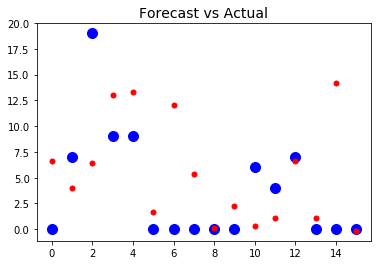

In [145]:
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(y_test)), "bo", markersize=10, label="Actual")
plt.plot(pd.Series(np.ravel(y_pred)), "r.", markersize=10, label="Forecast")
plt.show()

In [148]:
writer = tf.summary.FileWriter('.')
writer.add_graph(tf.get_default_graph())

## Get just 16 games for each player per season
Try and get a team's bye week, then, for player seasons with less than 16 games, set 0 for all weeks except team's bye week.

In [151]:
games_df = pd.read_csv("../pfr_pages/games.csv")

In [152]:
games_df.columns

Index(['gid', 'away', 'boxscore_word', 'boxscore_word_a', 'boxscore_word_href',
       'exp_pts_def', 'exp_pts_off', 'exp_pts_st', 'first_down_def',
       'first_down_off', 'game_date', 'game_day_of_week', 'game_location',
       'game_outcome', 'game_time', 'home', 'opp', 'opp_a', 'opp_href',
       'overtime', 'pass_yds_def', 'pass_yds_off', 'pts_def', 'pts_off',
       'rush_yds_def', 'rush_yds_off', 'season', 'team', 'team_record',
       'to_def', 'to_off', 'week_num', 'yards_def', 'yards_off',
       'team_is_home', 'team_wins'],
      dtype='object')

In [154]:
cols = ['gid','home','away','season','week_num']
games_df[cols].head(5)

,gid,home,away,season,week_num
0,200009030mia,mia,sea,2000,1
1,200009100min,min,mia,2000,2
2,200009170mia,mia,rav,2000,3
3,200009240mia,mia,nwe,2000,4
4,200010010cin,cin,mia,2000,5


In [155]:
teams = games_df.home.unique()
len(teams)

32

In [161]:
bye_weeks = {}
for tm in teams:
    for yr in games_df.season.unique():
        # Pull this team's games from this season
        df = games_df[
            (games_df.season == yr) &
            (
                (games_df.home == tm) |
                (games_df.away == tm)
            )
        ]
        for i in range(1,17):
            if (str(i) not in df.week_num.values):
                bye_weeks[(yr,tm)] = i
                break

bye_weeks

{(2000, 'atl'): 15,
 (2000, 'buf'): 4,
 (2000, 'car'): 4,
 (2000, 'chi'): 9,
 (2000, 'cin'): 1,
 (2000, 'clt'): 3,
 (2000, 'crd'): 3,
 (2000, 'dal'): 6,
 (2000, 'den'): 9,
 (2000, 'det'): 7,
 (2000, 'gnb'): 8,
 (2000, 'htx'): 1,
 (2000, 'jax'): 10,
 (2000, 'kan'): 6,
 (2000, 'mia'): 7,
 (2000, 'min'): 4,
 (2000, 'nor'): 5,
 (2000, 'nwe'): 9,
 (2000, 'nyg'): 8,
 (2000, 'nyj'): 5,
 (2000, 'oti'): 3,
 (2000, 'phi'): 16,
 (2000, 'pit'): 2,
 (2000, 'rai'): 5,
 (2000, 'ram'): 6,
 (2000, 'rav'): 14,
 (2000, 'sdg'): 8,
 (2000, 'sea'): 12,
 (2000, 'sfo'): 13,
 (2000, 'tam'): 7,
 (2000, 'was'): 11,
 (2001, 'atl'): 7,
 (2001, 'buf'): 5,
 (2001, 'car'): 14,
 (2001, 'chi'): 3,
 (2001, 'cin'): 8,
 (2001, 'cle'): 7,
 (2001, 'clt'): 4,
 (2001, 'crd'): 1,
 (2001, 'dal'): 6,
 (2001, 'den'): 15,
 (2001, 'det'): 3,
 (2001, 'gnb'): 7,
 (2001, 'htx'): 1,
 (2001, 'jax'): 5,
 (2001, 'kan'): 10,
 (2001, 'mia'): 6,
 (2001, 'min'): 8,
 (2001, 'nor'): 2,
 (2001, 'nwe'): 16,
 (2001, 'nyg'): 12,
 (2001, 'nyj'): 11,

In [175]:
playerstats.team.unique()

array(['WAS', 'NYG', 'TEN', 'JAX', 'TAM', 'NOR', 'SFO', 'LAR', 'SEA',
       'ARI', 'PIT', 'CLE', 'PHI', 'DAL', 'OAK', 'LAC', 'NYJ', 'NWE',
       'MIN', 'CHI', 'MIA', 'BUF', 'KAN', 'DEN', 'IND', 'HOU', 'GNB',
       'DET', 'CIN', 'BAL', 'CAR', 'ATL', 'SDG', 'STL'], dtype=object)

In [177]:
team_name_translator = {
    'WAS':'was', 'NYG':'nyg', 'TEN':'oti', 'JAX':'jax', 'TAM':'tam',
    'NOR':'nor', 'SFO':'sfo', 'LAR':'ram', 'SEA':'sea', 'ARI':'crd',
    'PIT':'pit', 'CLE':'cle', 'PHI':'phi', 'DAL':'dal', 'OAK':'rai',
    'LAC':'sdg', 'NYJ':'nyj', 'NWE':'nwe', 'MIN':'min', 'CHI':'chi',
    'MIA':'mia', 'BUF':'buf', 'KAN':'kan', 'DEN':'den', 'IND':'clt',
    'HOU':'htx', 'GNB':'gnb', 'DET':'det', 'CIN':'cin', 'BAL':'rav',
    'CAR':'car', 'ATL':'atl', 'SDG':'sdg', 'STL':'ram'
}

In [182]:
# Separate DataFrame for new rows
allgames = copy.deepcopy(playerstats)

for player in playerstats.player_href.unique():
    df = playerstats[
        playerstats.player_href == player
    ]
    name = df.player_a_x.values[0]
    active_seasons = df.season.unique()
    print(name,active_seasons)
    for ssn in active_seasons:
        ssndf = df[ df.season == ssn ]
        
        # Assuming players don't switch teams
        team = ssndf.team.values
#        print(ssndf[stat_cols+['team']])
        for wk in range(1,18):
            if wk != bye_weeks[(ssn,team_name_translator[team[0]])]:
                wkdf = ssndf[ ssndf.week == wk ]
                if not len(wkdf.index) >= 1:
                    # Add row to dataframe with 0 snaps that week
                    row = pd.Series({
                        'player_href': player,
                        'player_a_x': name,
                        'season': ssn,
                        'week': wk,
                        'offense': 0
                    })
                    allgames = allgames.append(row, ignore_index=True)

Kirk Cousins [2017 2016 2015 2014 2013 2012]
Kapri Bibbs [2017 2016]
Samaje Perine [2017]
Josh Doctson [2017 2016]
Ryan Grant [2017 2016 2015 2014]
Vernon Davis [2017 2016 2015 2014 2013 2012]
Brian Quick [2017 2016 2015 2014 2013 2012]
Niles Paul [2017 2016 2014 2013 2012]
Jamison Crowder [2017 2016 2015]
Eli Manning [2017 2016 2015 2014 2013 2012]
Orleans Darkwa [2017 2016 2015 2014]
Wayne Gallman [2017]
Shane Vereen [2017 2016 2015 2014 2013 2012]
Paul Perkins [2017 2016]
Rhett Ellison [2017 2016 2015 2014 2013 2012]
Travis Rudolph [2017]
Hunter Sharp [2017]
Marquis Bundy [2017]
Jerell Adams [2017 2016]
Marcus Mariota [2017 2016 2015]
Derrick Henry [2017 2016]
Taywan Taylor [2017]
Delanie Walker [2017 2016 2015 2014 2013 2012]
Eric Decker [2017 2016 2015 2014 2013 2012]
Jonnu Smith [2017]
Luke Stocker [2017 2016 2015 2014 2012]
Rishard Matthews [2017 2016 2015 2014 2013 2012]
Corey Davis [2017]
Blake Bortles [2017 2016 2015 2014]
Leonard Fournette [2017]
T.J. Yeldon [2017 2016 2015]

Virgil Green [2017 2016 2015 2014 2013 2012]
Jacoby Brissett [2017 2016]
Frank Gore [2017 2016 2015 2014 2013 2012]
Marlon Mack [2017]
Chester Rogers [2017 2016]
Jack Doyle [2017 2016 2015 2014 2013]
T.Y. Hilton [2017 2016 2015 2014 2013 2012]
Kamar Aiken [2017 2016 2015 2014]
Darrell Daniels [2017]
K.J. Brent [2017]
T.J. Yates [2017 2015 2014 2013 2012]
Alfred Blue [2017 2016 2015 2014]
Lamar Miller [2017 2016 2015 2014 2013 2012]
Chris Thompson [2017]
Will Fuller [2017 2016]
Braxton Miller [2017 2016]
Jay Prosch [2017 2016 2015 2014]
Cobi Hamilton [2017 2016]
Stephen Anderson [2017 2016]
Andre Ellington [2017 2016 2015 2014 2013]
Brett Hundley [2017 2016]
Joe Callahan [2017]
Randall Cobb [2017 2016 2015 2014 2013 2012]
Jamaal Williams [2017]
Devante Mays [2017]
Trevor Davis [2017 2016]
Emanuel Byrd [2017]
Geronimo Allison [2017 2016]
Michael Clark [2017]
Jeff Janis [2017 2016 2015 2014]
Matthew Stafford [2017 2016 2015 2014 2013 2012]
Tion Green [2017]
Ameer Abdullah [2017 2016 2015]

Darren McFadden [2017 2016 2015 2014 2013 2012]
Terrelle Pryor [2017 2016 2015 2013 2012]
Bobby Rainey [2017 2016 2015 2014 2013]
Bernard Reedy [2017]
Ed Eagan [2017]
Brian Mihalik [2017]
Andre Roberts [2017 2016 2015 2014 2013 2012]
Jordan Reed [2017 2016 2015 2014 2013]
Geoff Swaim [2017 2016 2015]
Pierre Garcon [2017 2016 2015 2014 2013 2012]
Cole Hikutini [2017]
Tre Madden [2017]
Deshaun Watson [2017]
Ryan Griffin [2017 2016 2015 2014 2013]
Jeremy Kerley [2017 2016 2015 2014 2013 2012]
Tanner Gentry [2017]
Zach Miller [2017 2016 2015]
Leonte Carroo [2017 2016]
Ryan Mallett [2017 2016 2015 2014 2012]
Jeremy Hill [2017 2016 2015 2014]
Kasen Williams [2017 2016 2015]
Taiwan Jones [2017 2016 2015 2013 2012]
Austin Davis [2017 2015 2014]
Robert Golden [2017 2014]
Terrell Watson [2017 2016]
Cody Core [2017 2016]
C.J. Spiller [2017 2016 2015 2014 2013 2012]
Griff Whalen [2017 2016 2015 2014 2013]
Vince Mayle [2017 2015]
Carson Palmer [2017 2016 2015 2014 2013 2012]
Arrelious Benn [2017 20

Chase Coffman [2015 2014 2013 2012]
Kevin Smith [2015]
Fred Jackson [2015 2014 2013 2012]
Donald Brown [2015 2014 2013 2012]
Javontee Herndon [2015]
Malcom Floyd [2015 2014 2013 2012]
Peyton Manning [2015 2014 2013 2012]
Owen Daniels [2015 2014 2013 2012]
Heath Miller [2015 2014 2013 2012]
Darius Jennings [2015]
Riley Cooper [2015 2014 2013 2012]
Rueben Randle [2015 2014 2013 2012]
Hakeem Nicks [2015 2014 2013 2012]
Myles White [2015 2013]
Roy Helu [2015 2014 2013 2012]
Cairo Santos [2015]
Jason Avant [2015 2014 2013 2012]
Kenbrell Thompkins [2015 2014 2013]
Karlos Williams [2015]
Anthony Dixon [2015 2014 2013 2012]
Steven Jackson [2015 2014 2013 2012]
Keshawn Martin [2015 2014 2013 2012]
Scott Chandler [2015 2014 2013 2012]
Greg Jennings [2015 2014 2013 2012]
Tony Moeaki [2015 2014 2012]
Roddy White [2015 2014 2013 2012]
James Jones [2015 2014 2013 2012]
Andrew Quarless [2015 2014 2013]
Jonas Gray [2015 2014]
Chris Polk [2015 2014 2013]
Nate Washington [2015 2014 2013 2012]
Calvin Joh

Ray Rice [2013 2012]
Bernard Scott [2013 2012]
Tandon Doss [2013 2012]
Domenik Hixon [2013 2012]
Marvin McNutt [2013 2012]
Jason Snelling [2013 2012]
Tony Gonzalez [2013 2012]
Darius Johnson [2013]
Fred Davis [2013 2012]
Brad Meester [2013]
Eric Page [2013]
Drew Davis [2013 2012]
Michael Robinson [2013 2012]
Jeron Mastrud [2013]
Greg Jenkins [2013]
Mat McBriar [2013]
David Paulson [2013 2012]
Earl Bennett [2013 2012]
Josh Bush [2013]
Isaiah Trufant [2013]
Saalim Hakim [2013]
Dorin Dickerson [2013 2012]
Vonta Leach [2013 2012]
Josh Johnson [2013]
Deji Karim [2013]
Dennis Johnson [2013]
Lestar Jean [2013 2012]
Michael Preston [2013 2012]
Quinn Johnson [2013 2012]
Skye Dawson [2013]
Mario Manningham [2013 2012]
Bryce Harris [2013]
Earl Thomas [2013]
Kevin Huber [2013 2012]
Chimdi Chekwa [2013]
Jacoby Ford [2013]
Chad Hall [2013]
Josh Boyce [2013]
Austin Collie [2013 2012]
Michael Egnew [2013]
Brandon Fields [2013 2012]
Jeremy Ebert [2013]
Corey Lynch [2013]
Ryan Taylor [2013 2012]
Davone 

## Try looking at something other than snaps

In [204]:
histstats = pd.read_csv('../data/ind_off_regseason.csv')
histstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73454 entries, 0 to 73453
Data columns (total 31 columns):
Unnamed: 0         73454 non-null int64
Unnamed: 0.1       73454 non-null int64
Unnamed: 1         0 non-null float64
fumbles            73454 non-null int64
fumbles_lost       73454 non-null int64
pass_att           73454 non-null int64
pass_cmp           73454 non-null int64
pass_int           73454 non-null int64
pass_long          73454 non-null int64
pass_rating        73454 non-null float64
pass_sacked        73454 non-null int64
pass_sacked_yds    73454 non-null int64
pass_td            73454 non-null int64
pass_yds           73454 non-null int64
player_a           73454 non-null object
player_href        73454 non-null object
rec                73454 non-null int64
rec_long           73454 non-null int64
rec_td             73454 non-null int64
rec_yds            73454 non-null int64
rush_att           73454 non-null int64
rush_long          73454 non-null int64
rush_td  

In [205]:
stat_cols = [
    'fumbles', 'fumbles_lost', 'pass_att', 'pass_cmp', 'pass_int',
    'pass_long', 'pass_rating', 'pass_sacked', 'pass_sacked_yds',
    'pass_td', 'pass_yds', 'targets', 'rec', 'rec_long', 'rec_td',
    'rec_yds', 'rush_att', 'rush_long', 'rush_td', 'rush_yds'
]

In [206]:
histstats = histstats.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 1'])

In [207]:
# Separate DataFrame for new rows
alloffense = copy.deepcopy(histstats)

for player in [s for s in histstats.player_href.unique() if s!=np.nan]:
    df = histstats[
        histstats.player_href == player
    ]
    name = histstats[histstats.player_href==player].player_a.values[0]
    active_seasons = df.season.unique()
    print(name,active_seasons)
    for ssn in active_seasons:
        ssndf = df[ df.season == ssn ]
        
        # Get player's team at start of season
        team = ssndf.team.values[0]
        for wk in range(1,18):
            wkdf = ssndf[ ssndf.week == wk ]
            # If we have a record, update player's current team
            if len(wkdf.index) >= 1:
                team = wkdf.team.values[0]
            # Otherwise, if not a bye week, add a row with no stats
            elif wk != bye_weeks[(ssn,team_name_translator[team])]:
                row = pd.Series({
                    'player_href': player,
                    'player_a': name,
                    'season': ssn,
                    'week': wk,
                    'team': team
                })
                alloffense = alloffense.append(row, ignore_index=True)

Kirk Cousins [2017 2016 2015 2014 2013 2012]
Kapri Bibbs [2017 2016]
Samaje Perine [2017]
Josh Doctson [2017 2016]
Ryan Grant [2017 2016 2015 2014]
Vernon Davis [2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006]
Brian Quick [2017 2016 2015 2014 2013 2012]
Niles Paul [2017 2016 2014 2013 2012 2011]
Jamison Crowder [2017 2016 2015]
Marcus Mariota [2017 2016 2015]
Derrick Henry [2017 2016]
Taywan Taylor [2017]
Delanie Walker [2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006]
Eric Decker [2017 2016 2015 2014 2013 2012 2011 2010]
Jonnu Smith [2017]
Luke Stocker [2017 2016 2015 2014 2012 2011]
Rishard Matthews [2017 2016 2015 2014 2013 2012]
Corey Davis [2017]
Jameis Winston [2017 2016 2015]
Peyton Barber [2017 2016]
Charles Sims [2017 2016 2015 2014]
Jesus Wilson [2017]
Chris Godwin [2017]
Adam Humphries [2017 2016 2015]
Mike Evans [2017 2016 2015 2014]
Cameron Brate [2017 2016 2015 2014]
Jacquizz Rodgers [2017 2016 2015 2014 2013 2012 2011]
Alan Cross [2017 2016]
Fred

Jordan Taylor [2017 2016]
Demaryius Thomas [2017 2016 2015 2014 2013 2012 2011 2010]
Bennie Fowler [2017 2016 2015]
Jeff Heuerman [2017 2016]
Isaiah McKenzie [2017]
Virgil Green [2017 2016 2015 2014 2013 2012 2011]
Dak Prescott [2017 2016]
Ezekiel Elliott [2017 2016]
Terrance Williams [2017 2016 2015 2014 2013]
Alfred Morris [2017 2016 2015 2014 2013 2012]
Brice Butler [2017 2016 2015 2014 2013]
Ryan Switzer [2017]
Dez Bryant [2017 2016 2015 2014 2013 2012 2011 2010]
Jason Witten [2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004
 2003]
James Hanna [2017 2015 2014 2013 2012]
Noah Brown [2017]
DeShone Kizer [2017]
Isaiah Crowell [2017 2016 2015 2014]
Duke Johnson [2017 2016 2015]
Josh Gordon [2017 2014 2013 2012]
Rashard Higgins [2017 2016]
David Njoku [2017]
Corey Coleman [2017 2016]
Ricardo Louis [2017 2016]
Seth Devalve [2017 2016]
Marquez Williams [2017]
Andy Dalton [2017 2016 2015 2014 2013 2012 2011]
Joe Mixon [2017]
Giovani Bernard [2017 2016 2015 2014 2013]
T

Chad Williams [2017]
Byron Marshall [2017 2016]
Maurice Harris [2017 2016]
Eddie Lacy [2017 2016 2015 2014 2013]
Jamize Olawale [2017 2016 2015 2014 2013]
Isaac Whitney [2017]
Marquette King [2017 2016]
Geno Smith [2017 2016 2015 2014 2013]
Cameron Erving [2017]
Brad Nortman [2017 2015]
Donte Moncrief [2017 2016 2015 2014]
C.J. Fiedorowicz [2017 2016 2015 2014]
Bruce Ellington [2017 2015 2014]
Jake Rudock [2017]
Nick Bellore [2017 2012]
Michael Palardy [2017]
Shaq Thompson [2017]
Jordan Matthews [2017 2016 2015 2014]
Logan Thomas [2017 2014]
Andre Holmes [2017 2016 2015 2014 2013 2012]
Harry Douglas [2017 2016 2015 2014 2013 2012 2011 2010 2008]
Ryan Fitzpatrick [2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2006 2005]
C.J. Beathard [2017]
Nate Ebner [2017]
Coby Fleener [2017 2016 2015 2014 2013 2012]
Matt Moore [2017 2016 2015 2014 2013 2012 2011 2010 2009 2007]
Damien Williams [2017 2016 2015 2014]
Cody Kessler [2017 2016]
Bryce Treggs [2017 2016]
Tre McBride [2017 2015]
Sam Koch

Joique Bell [2016 2015 2014 2013 2012]
Riley Dixon [2016]
Cecil Shorts [2016 2015 2014 2013 2012 2011]
George Farmer [2016]
Larry Donnell [2016 2015 2014 2013]
Dominique Jones [2016 2013 2012]
Bradley Marquez [2016 2015]
Jake Fisher [2016 2015]
Marquess Wilson [2016 2015 2014 2013]
Gerald Christian [2016]
Dezmin Lewis [2016]
Will Tukuafu [2016 2015 2014]
Jeremy Butler [2016 2015]
Dwayne Harris [2016 2015 2014 2013 2012]
Eddie Royal [2016 2015 2014 2013 2012 2011 2010 2009 2008]
Walt Powell [2016]
Antwon Blake [2016 2014]
Mike James [2016 2014 2013]
Paul Lasike [2016]
Percy Harvin [2016 2015 2014 2013 2012 2011 2010 2009]
Justin Perillo [2016 2015]
Hakeem Valles [2016]
Antonio Andrews [2016 2015 2014]
Antone Smith [2016 2015 2014 2013 2012 2010]
Matt Darr [2016]
Don Jackson [2016]
Dexter McCluster [2016 2015 2014 2013 2012 2011 2010]
Donald Penn [2016 2015 2014 2013 2011 2010 2009]
Daniel Lasco [2016]
Devin Street [2016 2015 2014]
Jordan Payton [2016]
Colton Schmidt [2016 2015]
Jacob Ta

Josh Harris [2014]
Maurkice Pouncey [2014]
Will Allen [2014]
Dri Archer [2014]
John Conner [2014 2013 2012 2011 2010]
Zach Sudfeld [2014 2013]
Adrien Robinson [2014]
Brian Tyms [2014 2013]
Steve Maneri [2014 2013 2012 2011]
Nick Toon [2014 2013]
Robert Meachem [2014 2013 2012 2011 2010 2009 2008]
Daniel Thomas [2014 2013 2012 2011]
Brandon Gibson [2014 2013 2012 2011 2010 2009]
Richard Gordon [2014 2013 2012 2011]
Ace Sanders [2014 2013]
Trent Richardson [2014 2013 2012]
Reggie Wayne [2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003]
Matt Flynn [2014 2013 2012 2011 2010 2009 2008]
Jed Collins [2014 2013 2012 2011]
Jeremy Stewart [2014 2013 2012]
Connor Shaw [2014]
Rodney Smith [2014]
Dane Sanzenbacher [2014 2013 2012 2011]
Josh Morgan [2014 2013 2012 2011 2010 2009 2008]
Dante Rosario [2014 2013 2012 2011 2010 2009 2008 2007]
Kyle Orton [2014 2013 2012 2011 2010 2009 2008 2007 2005]
Devin Hester [2014 2012 2011 2010 2009 2008 2007 2006]
Bear Pascoe [2014 2013 2012 2011 2010 

Brian Robiskie [2013 2012 2011 2010 2009]
Brett Kern [2013 2011 2010]
Jeff Demps [2013]
Chris Maragos [2013]
Mike Goodson [2013 2012 2011 2010 2009]
Clyde Gates [2013 2012 2011]
Konrad Reuland [2013 2012]
Da'Rel Scott [2013 2012 2011]
Stephen Williams [2013 2010]
Mikel Leshoure [2013 2012]
Patrick Edwards [2013]
Joe Anderson [2013]
Armond Smith [2013 2012 2011]
Billy Bajema [2013 2012 2011 2010 2009 2008 2007 2006 2005]
David Wilson [2013 2012]
Nate Solder [2013]
Tony Scheffler [2013 2012 2011 2010 2009 2008 2007 2006]
Shann Schillinger [2013]
Kevin Cone [2013 2012]
Dashon Goldson [2013 2012]
Ben Obomanu [2013 2012 2011 2010 2009 2007]
Allen Reisner [2013 2012 2011]
Nate Byham [2013 2012 2010]
Spencer Lanning [2013]
Josh Aubrey [2013]
Mike McNeill [2013 2012]
Isaac Redman [2013 2012 2011 2010]
Ryan Spadola [2013]
Tori Gurley [2013]
Bradie Ewing [2013]
LaRod Stephens-Howling [2013 2012 2011 2010 2009]
Vick Ballard [2013 2012]
Shiloh Keo [2013]
Kory Sperry [2013 2011 2010 2009]
Lavelle H

Chris Redman [2011 2010 2009 2007 2003]
Chester Taylor [2011 2010 2009 2008 2007 2006 2005 2004 2003]
Ryan Torain [2011 2010 2008]
T.J. Houshmandzadeh [2011 2010 2009 2008 2007 2006 2005 2004]
Manase Tonga [2011]
Josh Baker [2011]
Ryan D'Imperio [2011]
Will Yeatman [2011]
Anthony Becht [2011 2009 2008 2007 2006 2005 2004 2003]
Brock Bolen [2011 2010]
Brody Eldridge [2011 2010]
Russ Hochstein [2011]
Stephen McGee [2011 2010]
Chauncey Washington [2011 2008]
Mike Caussin [2011]
Reggie Kelly [2011 2010 2008 2007 2006 2005 2004 2003]
Chansi Stuckey [2011 2010 2009 2008]
Zack Pianalto [2011]
Mike Williams [2011 2010 2007 2006 2005]
Mike Kafka [2011]
Mark Brunell [2011 2010 2009 2006 2005 2004 2003]
Kevin Faulk [2011 2010 2009 2008 2007 2006 2005 2004 2003]
John Gilmore [2011 2010 2009 2008 2007 2006 2005 2004]
Emmanuel Arceneaux [2011]
Jim Kleinsasser [2011 2010 2009 2008 2007 2006 2005 2004 2003]
Taylor Price [2011 2010]
Anthony Gonzalez [2011 2010 2008 2007]
Colin Cochart [2011]
Caleb Hani

Javarris Williams [2009]
Bobby Wade [2009 2008 2007 2006 2005 2004 2003]
Sam Giguere [2009]
Ryan Moats [2009 2008 2006 2005]
Andre' Davis [2009 2008 2007 2006 2005 2004 2003]
Ahman Green [2009 2008 2007 2006 2005 2004 2003]
Daunte Culpepper [2009 2008 2007 2006 2005 2004 2003]
Kalvin Pearson [2009]
Dennis Northcutt [2009 2008 2007 2006 2005 2004 2003]
Chris Jennings [2009]
J.T. O'Sullivan [2009 2008 2007 2004]
Jeremi Johnson [2009 2007 2006 2005 2004 2003]
Laveranues Coles [2009 2008 2007 2006 2005 2004 2003]
Daniel Coats [2009 2008 2007]
Jason McKie [2009 2008 2007 2006 2005 2004]
Brad Hoover [2009 2008 2007 2006 2005 2004 2003]
Muhsin Muhammad [2009 2008 2007 2006 2005 2004 2003]
Joe Klopfenstein [2009 2008 2007 2006]
Kurt Warner [2009 2008 2007 2006 2005 2004 2003]
Tyler Grisham [2009]
Reggie Brown [2009 2008 2007 2006 2005]
Todd Watkins [2009]
Torry Holt [2009 2008 2007 2006 2005 2004 2003]
Nate Hughes [2009]
Tom Santi [2009 2008]
Chris Brown [2009 2007 2006 2005 2004 2003]
Spencer

Biren Ealy [2007]
Chad Lucas [2007]
Chris Weinke [2007 2006 2005]
Maurice Hicks [2007 2006 2005 2004]
Marcus Pollard [2007 2006 2005 2004 2003]
Cedrick Wilson [2007 2006 2005 2004 2003]
Willie Reid [2007]
John Madsen [2007 2006]
Joe Kowalewski [2007]
David Tyree [2007 2006 2005 2004 2003]
Reuben Droughns [2007 2006 2005 2004 2003]
Eric Johnson [2007 2006 2004]
Chris Barclay [2007]
Samie Parker [2007 2006 2005 2004]
Boomer Grigsby [2007]
Jason Dunn [2007 2006 2005 2004 2003]
LaBrandon Toefield [2007 2006 2005 2004 2003]
Isaac Smolko [2007]
Chad Owens [2007 2006 2005]
Kenton Keith [2007]
Clifton Dawson [2007]
Craphonso Thorpe [2007]
Bryan Fletcher [2007 2006 2005]
Ron Dayne [2007 2006 2005 2004]
Darius Walker [2007]
Craig Nall [2007 2004 2003]
Vernand Morency [2007 2006 2005]
Shaun Bodiford [2007]
Chad Mustard [2007 2006 2004 2003]
Terry Glenn [2007 2006 2005 2004 2003]
Tyson Thompson [2007 2006 2005]
Joe Jurevicius [2007 2006 2005 2004 2003]
Alex Haynes [2007]
Drew Carter [2007 2006 200

Jason McAddley [2005 2004 2003]
Brian Jennings [2005]
Doug Flutie [2005 2004 2003]
Marc Boerigter [2005 2003]
Jonathan Wells [2005 2004 2003]
Andrae Thurman [2005 2004]
Tim Euhus [2005 2004]
Damien Anderson [2005 2004 2003]
Jimmy Farris [2005 2003]
Johnnie Morton [2005 2004 2003]
Rasheed Marshall [2005]
Mike Bartrum [2005 2004]
Tom Ashworth [2005]
Chris Horn [2005 2004]
Charles Rogers [2005 2003]
Joe Burns [2005 2004 2003]
Jamel White [2005 2004 2003]
John Navarre [2005 2004]
LeRon McCoy [2005]
Gregg Guenther [2005]
Lamont Hall [2005 2004]
Justin Snow [2005]
Domanick Williams [2005 2004 2003]
Kris Brown [2005]
Bryan Johnson [2005 2004 2003]
Nehemiah Broughton [2005]
Cam Cleeland [2005 2004 2003]
Duce Staley [2005 2004 2003]
Curtis Martin [2005 2004 2003]
Derick Armstrong [2005 2004 2003]
Jarrod Baxter [2005 2004]
Robert Johnson [2005]
Alex Holmes [2005]
James Jackson [2005 2004 2003]
Tommy Maddox [2005 2004 2003]
Zeron Flemister [2005 2003]
Kliff Kingsbury [2005]
Dante Ridgeway [2005]


In [208]:
alloffense[ alloffense.player_a=="Samaje Perine" ].sort_values(by='week')

,fumbles,fumbles_lost,pass_att,pass_cmp,pass_int,pass_long,pass_rating,pass_sacked,pass_sacked_yds,pass_td,...,rush_long,rush_td,rush_yds,targets,team,gid,season,week,home,away
73509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,WAS,NaN,2017,1,NaN,NaN
4487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,67.0,1.0,WAS,201709170ram,2017,2,ram,was
4168,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,49.0,1.0,WAS,201709240was,2017,3,was,rai
3848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,27.0,0.0,WAS,201710020kan,2017,4,kan,was
3294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,23.0,3.0,WAS,201710150was,2017,6,was,sfo
73510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,WAS,NaN,2017,7,NaN,NaN
73511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,WAS,NaN,2017,8,NaN,NaN
2469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,9.0,0.0,WAS,201711050sea,2017,9,sea,was
2184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,35.0,1.0,WAS,201711120was,2017,10,was,min
1896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,1.0,117.0,2.0,WAS,201711190nor,2017,11,nor,was


In [213]:
# Fill all newly created rows with 0 stats
for col in stat_cols:
    alloffense[col] = alloffense[col].fillna(0)

In [214]:
alloffense[ alloffense.player_a=="Samaje Perine" ].sort_values(by='week')

,fumbles,fumbles_lost,pass_att,pass_cmp,pass_int,pass_long,pass_rating,pass_sacked,pass_sacked_yds,pass_td,...,rush_long,rush_td,rush_yds,targets,team,gid,season,week,home,away
73509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,WAS,NaN,2017,1,NaN,NaN
4487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,67.0,1.0,WAS,201709170ram,2017,2,ram,was
4168,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,49.0,1.0,WAS,201709240was,2017,3,was,rai
3848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,27.0,0.0,WAS,201710020kan,2017,4,kan,was
3294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,23.0,3.0,WAS,201710150was,2017,6,was,sfo
73510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,WAS,NaN,2017,7,NaN,NaN
73511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,WAS,NaN,2017,8,NaN,NaN
2469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,9.0,0.0,WAS,201711050sea,2017,9,sea,was
2184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,35.0,1.0,WAS,201711120was,2017,10,was,min
1896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,1.0,117.0,2.0,WAS,201711190nor,2017,11,nor,was


In [215]:
alloffense.to_csv("../data/ind_off_allplayers_allgames.csv")